**Disclaimer:** Homework assignment for Johns Hopkins University, EN.553.635.01.SP25 – Bayesian Statistics for the Physical Sciences. It is intended solely for educational purposes.

**Exercise01**<br>
Jeffreys Ignorance Prior for covariance matrices
$$
C = \begin{pmatrix}
    a & b \\
    b & c
\end{pmatrix}
$$
where C is symmetric and positive definite, which means that $C^{-1}$ exists.

What is the Jeffrey's Ignorance Prior for C?<br>
- Hint: $T(C) = ACA^{\top}$, $\forall A$ invertible
- Hint: $p(T(C))d(T(C)) = p(C)d(C)$, $p(C')|(\frac{\partial C'}{\partial C})| = p(C)$

**Solu01:**<br>
Rewrite the symmetric, positive definite conditions as the following:<br>
$\{(a,b,c)| a>0, c>0, ac-b^2>0\}$<br>
Then the volume element $dC = da \wedge db \wedge dc$<br>
$p(C)dC = p(a,b,c) (da) (db) (dc)$<br>

Consider one of the most foundamental transformation, scalling, $\alpha \in \mathbb{R}$<br>
$\begin{align}
C' &= (\alpha \mathbf{I}) C (\alpha \mathbf{I}) = \alpha^2 C \\
da' \wedge db' \wedge dc' &= \alpha^6 da \wedge db \wedge dc \\
d(\alpha^2 C ) &= \alpha^6 dC
\end{align}$<br>
Since for Jeffrey's prior we will need to satisfy the invariace condition, $p(C')d(C') = p(C)d(C)$, we have:<br>
$p(C) = \alpha^{6} p(C')$<br>

Expand this to all kind of transformations, the shape invariant is the $det(C)$<br>
Assume that $p(C)=f(det(C))$, $f$ is a functional form of $det(C)$<br>
For a n by n matrix, $det(\alpha^2 C) = \alpha^{2n} det(C)$<br>
So that $p(\alpha^2 C) = f(\alpha^4 det(C))$ in this 2 by 2 case<br>
$\alpha^{-6} p(C) = f(\alpha^4 det(C))$<br>
$\alpha^{-6} f(x) = f(\alpha^4 x)$, where $x=det(C)$<br>

Let $y := \alpha^4 x$, $\alpha = (\frac{y}{x})^{\frac{1}{4}}$:<br>
$\begin{align}
f(y) &= (\frac{y}{x})^{-\frac{3}{2}} f(x) \\
&\propto y^{-\frac{3}{2}}
\end{align}$

Since $\alpha$ is a constant, now:<br>
$f(x) \propto c x^{-\frac{3}{2}}$, where $c$ is a constant<br>
$f(det(c)) \propto det(c)^{-\frac{3}{2}}$<br>
So we have:<br>
$\begin{align}
p(C) &\propto det(C)^{-\frac{3}{2}} \\
&= \frac{1}{det(C)^{\frac{3}{2}}} \\
&= \frac{1}{(ac-b^2)^{\frac{3}{2}}}
\end{align}$<br>



















**Exercise02**<br>
Compute the variance of  U(0,1)

**Solu02:**<br>
Given uniform distribution, $p(x)=1$ for $0<x<1$<br>
$\mathbb{E}[x] = \int_0^1 x dx = \frac{1}{2}$<br>
$\mathbb{E}[x^2] = \int_0^1 x^2 dx = \frac{1}{3}$<br>
The variance is the 2nd central moment:<br>
$\begin{align}
Var(x) &= \mathbb{E}[x^2] - \mathbb{E}[x]^2 \\
&= \frac{1}{3} - \frac{1}{4} \\
&= \frac{1}{12}
\end{align}$<br>


**Exercise03**<br>
If $Var(X)$ is $\sigma_x^2$ and $Var(Y)$ is $\sigma_y^2$, what is $Var(X+Y)$, assume $X$ and $Y$ are independent.<br>

**Solu03:**<br>
$Var(X+Y) = Var(X) + Var(Y) + 2Cov(X,Y)$<br>
Since $X$ and $Y$ are independent, $Cov(X,Y) = 0$.<br>
So, $Var(X+Y) = Var(X) + Var(Y) = \sigma_x^2 + \sigma_y^2$.

**Exercise04**<br>
(a) Compute the pdf $p(z)$ where $z=x^3$ and $x \sim N(0,1)$;<br>
(b) Compute 10,000 z and histogram to verify results;<br>
(c) Demonstrate by numerical experiment that p(y) where $y=\sum_{i=1}^{i=n}z_i$ is Gaussian.

**Solu04:**<br>
(a)<br>
By change of variable, $p(z)=p(x)\left|\frac{d x}{d z}\right|=\frac{1}{3 \sqrt{2 \pi}|z|^{2 / 3}} \exp \left(-\frac{|z|^{2 / 3}}{2}\right)$

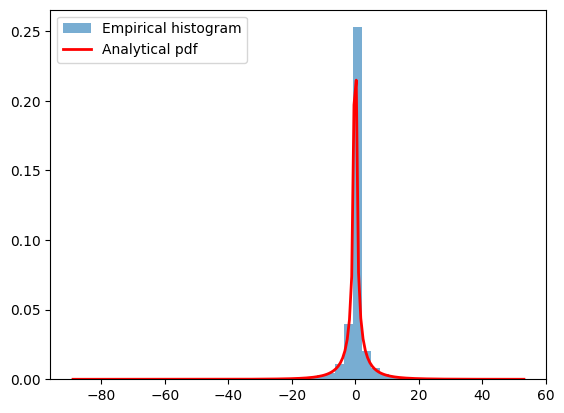

In [15]:
# b)

import numpy as np
import matplotlib.pyplot as plt

N = 10000
X = np.random.randn(N)  

Z = X**3

plt.hist(Z, bins=50, density=True, alpha=0.6, label='Empirical histogram')

z_grid = np.linspace(min(Z), max(Z), 200)
pdf_z = (1.0 / (3.0 * (np.abs(z_grid)**(2/3)) * np.sqrt(2.0*np.pi))) \
        * np.exp(-(np.abs(z_grid)**(2/3))/2.0)

plt.plot(z_grid, pdf_z, 'r-', lw=2, label='Analytical pdf')
plt.legend()
plt.show()


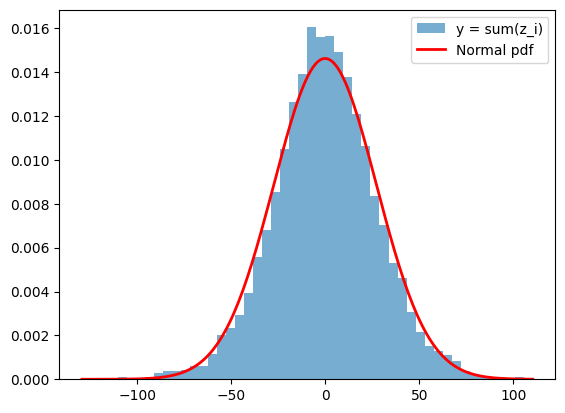

In [18]:
# c)

from scipy.stats import norm

n = 50 # number of z_i
N = 10000
X = np.random.randn(n, N) # (50, 10000)
Z = X**3
Y = np.sum(Z, axis=0) # summing across the rows for each column
# print(Y.shape)

plt.hist(Y, bins=50, density=True, alpha=0.6, label='y = sum(z_i)')

mu_Y, std_Y = np.mean(Y), np.std(Y)
y_grid = np.linspace(min(Y), max(Y), 200)
pdf_Y = norm.pdf(y_grid, mu_Y, std_Y)

plt.plot(y_grid, pdf_Y, 'r-', lw=2, label='Normal pdf')
plt.legend()
plt.show()
